In [3]:
#librerias
import numpy as np
import time
from datetime import datetime
#from loaddata import *
import matplotlib

#sklearn
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics as met
import joblib

#mne
import mne
from mne.decoding import CSP
from mne.channels import read_layout
from mne.channels import make_standard_montage
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)

matplotlib.use('Qt5Agg')

In [4]:
raw = mne.io.read_raw_fif("data_eeg.fif", preload=True)
events_from_file = mne.read_events("event.fif",)

raw.plot(scalings=None, n_channels=8,  events = events_from_file)

Opening raw data file data_eeg.fif...
    Range : 0 ... 126077 =      0.000 ...   504.308 secs
Ready.
Reading 0 ... 126077  =      0.000 ...   504.308 secs...


<ipython-input-4-34c0125228bd>:2: RuntimeWarning: This filename (event.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events_from_file = mne.read_events("event.fif",)


Using matplotlib as 2D backend.


<MNEBrowseFigure size 1600x1600 with 4 Axes>

Channels marked as bad: none


In [3]:
events_from_file[:,2]==0

array([ True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True, False, False,  True])

In [4]:
event_pause=events_from_file[events_from_file[:,2]==0]
event_right=events_from_file[events_from_file[:,2]==1]

In [5]:
event_pasue_id = {'pause': 0}
event_right_id = {'right': 1}

tmin = 0.5
tmax = 1.5
epochs_pause = mne.Epochs(raw, events=event_pause, event_id=event_pasue_id, tmin=tmin, tmax=tmax, baseline=None, preload=True, verbose=False)
epochs_right = mne.Epochs(raw, events=event_right, event_id=event_right_id, tmin=tmin, tmax=tmax, baseline=None, preload=True, verbose=False)


In [6]:
epochs_pause.load_data()  # Resampling to save memory.
epochs_pause.resample(250, npad='auto')
epochs_right.load_data()  # Resampling to save memory.
epochs_right.resample(250, npad='auto')
evoked_pause = epochs_pause.average()
evoked_right = epochs_right.average()

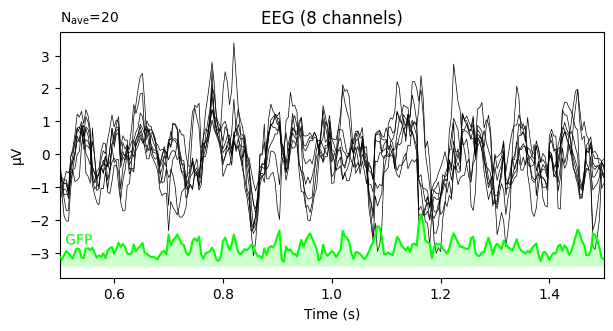

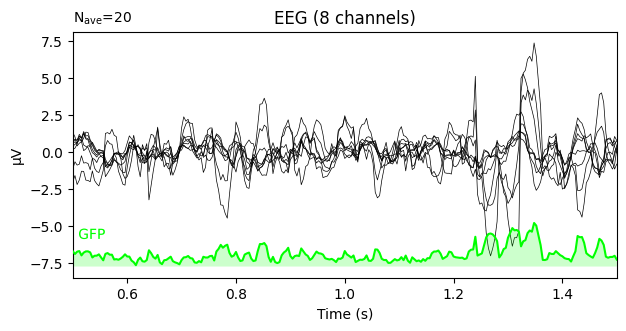

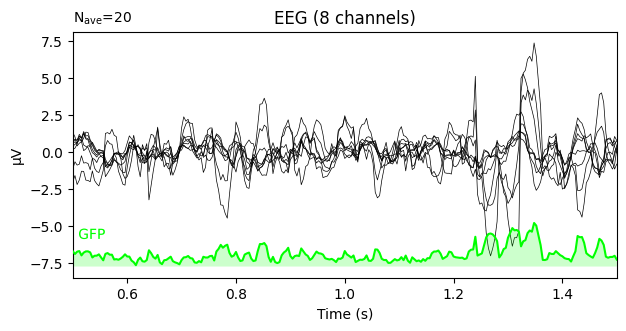

In [7]:
#dict(mag=1e-12, grad=4e-11, eeg=20e-6, eog=150e-6, ecg=5e-4, emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1, resp=1, chpi=1e-4, whitened=1e2)
evoked_pause.plot(window_title='Standard', gfp=True, time_unit='s', scalings=None)
evoked_right.plot(window_title='Standard', gfp=True, time_unit='s', scalings=None)

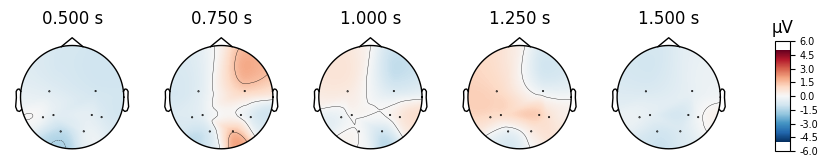

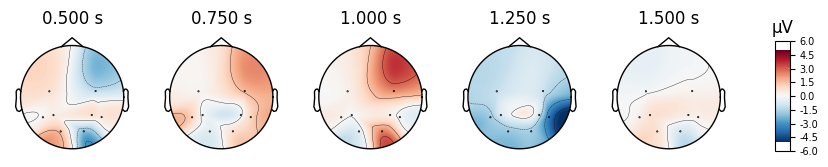

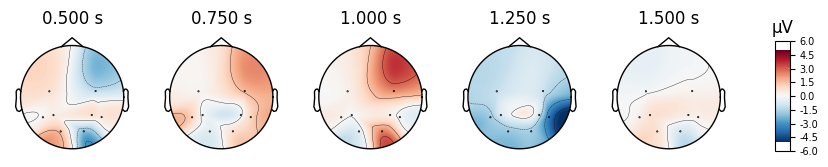

In [8]:
evoked_pause.plot_topomap(times=[0.5, 0.75, 1, 1.25, 1.5], ch_type='eeg', vmin=-5, vmax=5)
evoked_right.plot_topomap(times=[0.5, 0.75, 1, 1.25, 1.5], ch_type='eeg', vmin=-5, vmax=5)

In [16]:
event_id = {'right': 1, 'pause': 0}

tmin = 0.5
tmax = 1.5
epochs = mne.Epochs(raw, events=events_from_file, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True, verbose=False)

In [23]:
epochs

Number of events,40
Events,pause: 20right: 20
Time range,0.500 – 1.500 sec
Baseline,off


In [18]:
epochs.load_data()  # Resampling to save memory.
epochs.resample(250, npad='auto')
evoked = epochs.average()

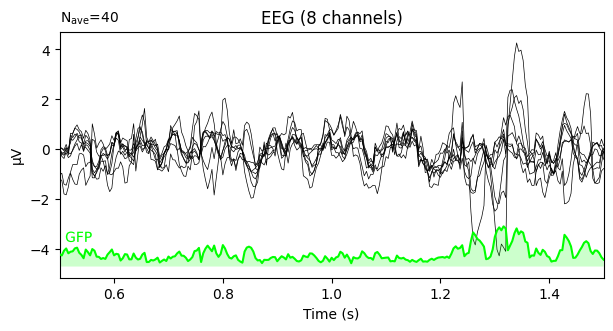

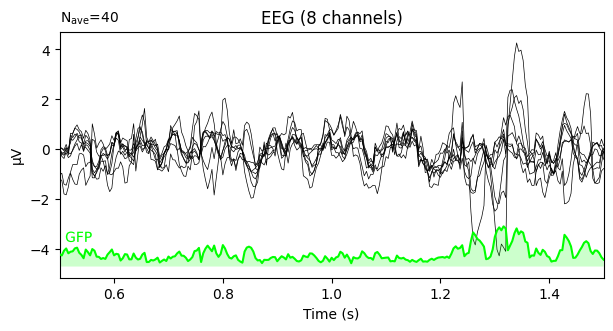

In [19]:
evoked.plot(window_title='Standard', gfp=True, time_unit='s', scalings=None)

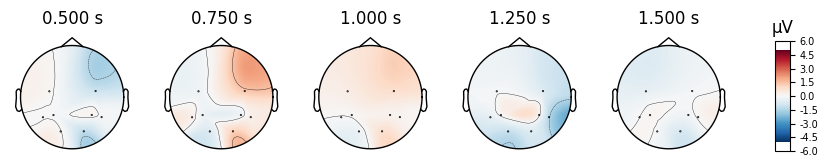

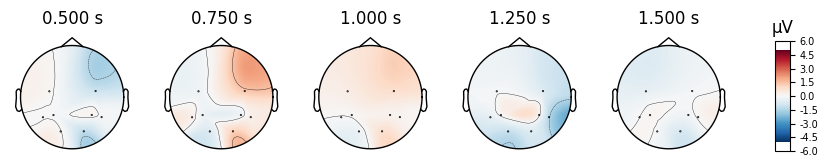

In [20]:
evoked.plot_topomap(times=[0.5, 0.75, 1, 1.25, 1.5], ch_type='eeg', vmin=-5, vmax=5)